# Parameter Recovery and Model Recovery

In [1]:
%load_ext autoreload
%autoreload 2

# Uncomment next line to enable interactive plots!
# %matplotlib notebook

import numpy as np
from run_model_recovery import *
    
# Parameter settings
n_trials = 1000

## 1. Paremeter Recovery

### 1.1 LossCounting

If we fix threshold_std = 0, perfect. Note that the para_bounds are still [0,50],[0,10]

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [04:01<00:00,  9.67s/it]


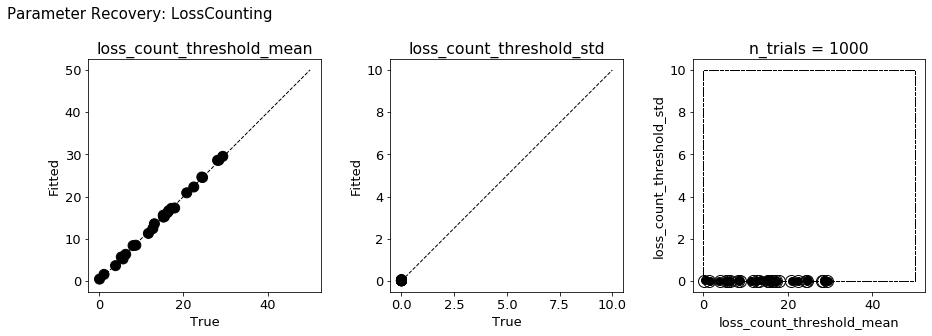

In [2]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,0]], n_models = 25, method = 'random_uniform')

fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials);    


If we allow loss_count_threshold_std

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [03:03<00:00,  7.35s/it]


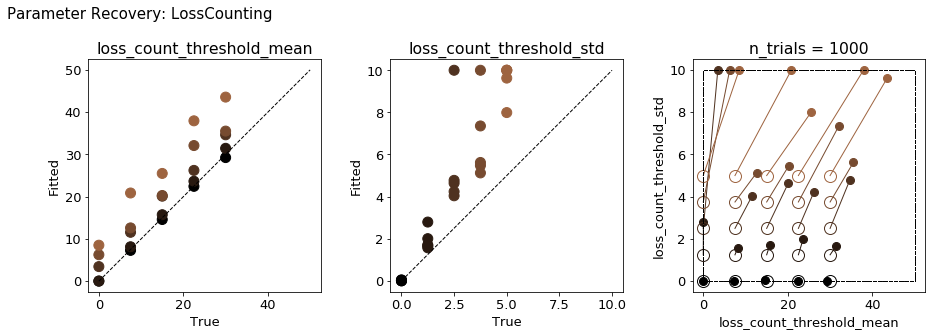

In [3]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')

fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials);    

### Likelihood landscape

Likelihood landscape plots show that this is not due to the fitting per se, but because of a systematic bias introduced by the inherent correlation between loss count threshold mean and std.

compute_LL_surface: 100%|████████████████████████████████████████████████████████████| 400/400 [00:27<00:00, 14.44it/s]


Fitting...


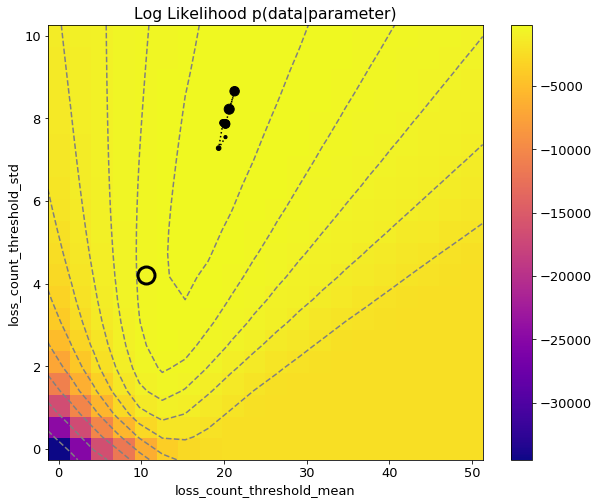

In [13]:
n_trials = 1000
forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]
n_grid = [20,20]
true_para = [10,4]

# LL_surface
compute_LL_surface(forager, para_names, para_bounds, n_grid = n_grid, true_para = true_para, n_trials = n_trials);


No such bias when true_std = 0

compute_LL_surface: 100%|████████████████████████████████████████████████████████████| 400/400 [00:27<00:00, 14.57it/s]


Fitting...


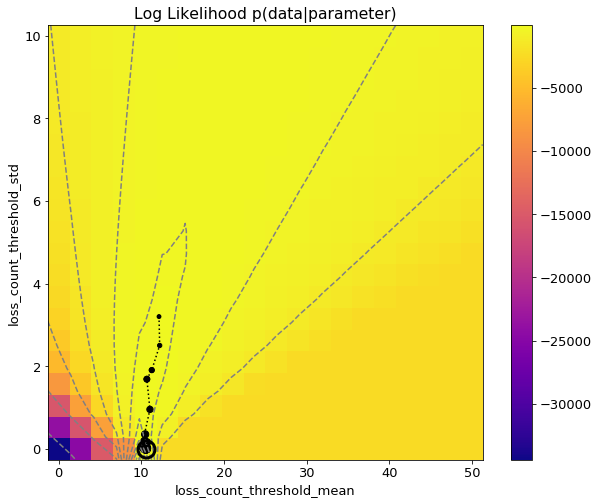

In [14]:
n_trials = 1000
forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]
n_grid = [20,20]
true_para = [10,0]

# LL_surface
compute_LL_surface(forager, para_names, para_bounds, n_grid = n_grid, true_para = true_para, n_trials = n_trials);

### Compare differential_evolution (global optimizer) with L-BFGS-B (local optimizer with `n_x0s` different initializations)

The results suggest that both methods are good!! (at least for now)
- DE: use its own parallel method
- L-BFGS-B: random initialization in parallel

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [02:29<00:00,  5.99s/it]


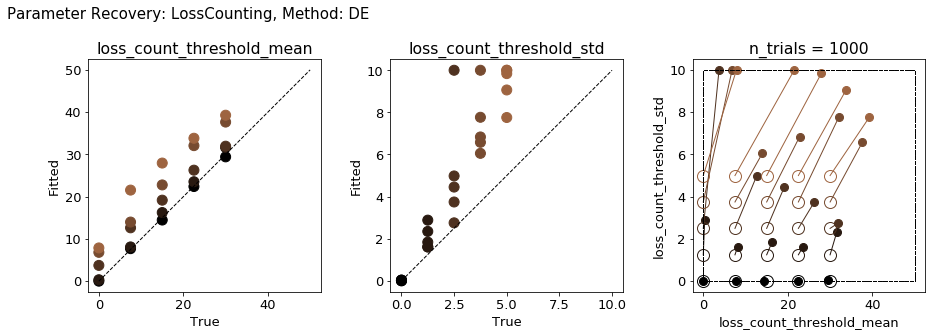

In [8]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')

fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, fit_method = 'DE');    

`n_x0s` = 1: Lots of local minima!!

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [01:31<00:00,  3.66s/it]


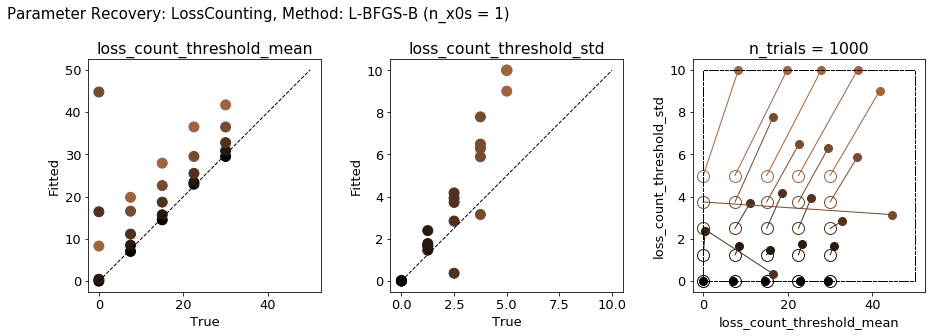

In [9]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')
fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, fit_method = 'L-BFGS-B', n_x0s = 1);    

`n_x0s` = 8: no local optima issue! (in parallel)

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [03:29<00:00,  8.39s/it]


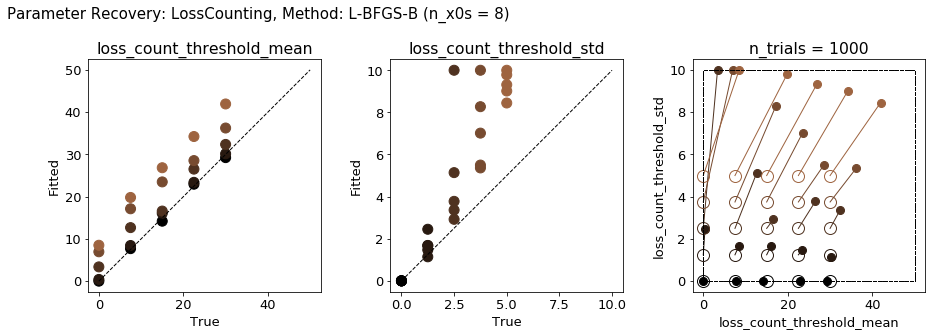

In [8]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')
fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, fit_method = 'L-BFGS-B', n_x0s = 8);    

`n_x0s` = 16: very robust, but slow. Not necessary.

Parameter Recovery, LossCounting: 100%|████████████████████████████████████████████████| 25/25 [05:07<00:00, 12.30s/it]


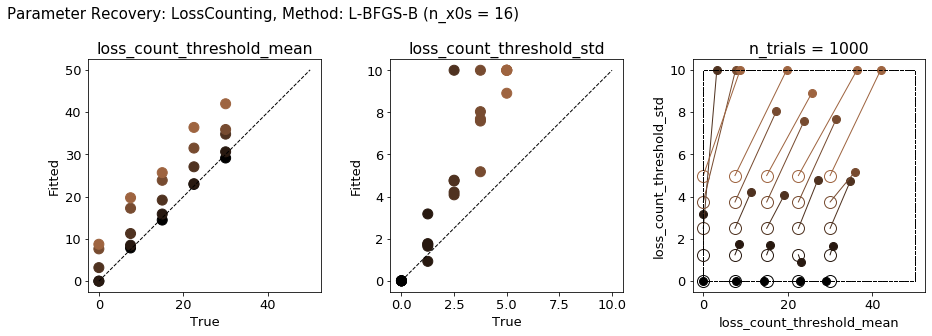

In [7]:
n_trials = 1000

forager = 'LossCounting'
para_names = ['loss_count_threshold_mean','loss_count_threshold_std']
para_bounds = [[0,0],[50,10]]

# Para recovery
true_paras = generate_true_paras([[0,0],[30,5]], n_models = [5,5], method = 'linspace')
fit_para_recovery(forager = forager, 
                  para_names = para_names, para_bounds = para_bounds, 
                  true_paras = true_paras, n_trials = n_trials, fit_method = 'L-BFGS-B', n_x0s = 16);    